Split map shape: (192, 512, 512, 1)


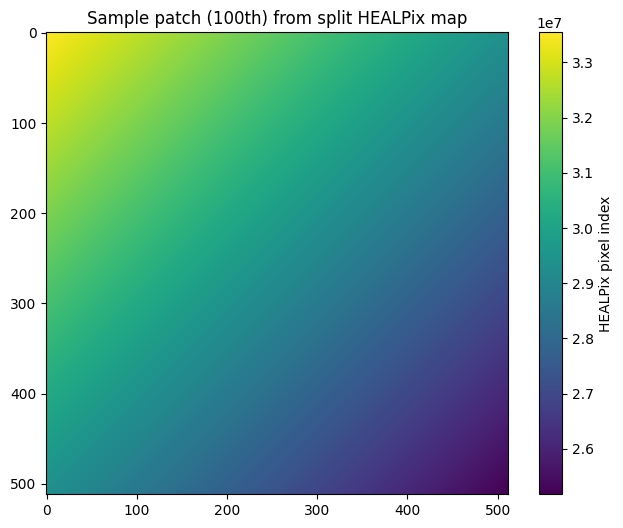

/home/nisl/Programs/miniconda3/envs/lensquest/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


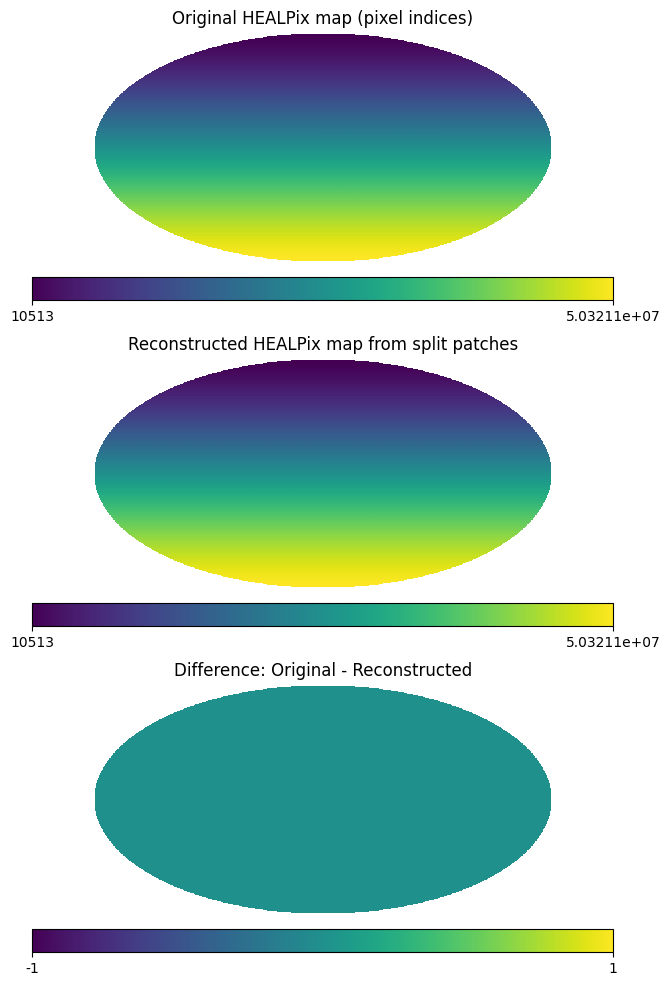

In [1]:
# Import required libraries
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Set HEALPix resolution parameter
# nside=2048 corresponds to approximately 1.7 arcminute pixel resolution
nside = 2048

# Create a HEALPix map with pixel indices as values
# This creates an array with 12*nside^2 elements (50,331,648 pixels for nside=2048)
mmap = np.arange(hp.nside2npix(nside))

# Load the splitting index array
# This array contains indices that map HEALPix pixels to 192 separate 512x512 patches
arr = np.load("arr_nside2048_192x512x512.npz")['data']

# Load the rearrangement index array
# This array contains indices to reconstruct the original HEALPix map from the split patches
rearr = np.load("rearr_nside2048.npz")['data']

# Apply the splitting transformation
# This maps the original HEALPix pixels to the 192 patches of size 512x512
arr_mmap = mmap[arr]

# Reconstruct the original HEALPix map from the split patches
# First flatten the patches, then apply the rearrangement indices
rearr_mmap = arr_mmap.reshape(-1)[rearr]

# Print the shape of the split map array
print(f"Split map shape: {arr_mmap.shape}")

# Display the 100th patch as a 2D image
plt.figure(figsize=(8, 6))
plt.imshow(arr_mmap[100, :, :, 0], cmap='viridis')
plt.title("Sample patch (100th) from split HEALPix map")
plt.colorbar(label='HEALPix pixel index')
plt.show()

# Create Mollweide projections for comparison
plt.figure(figsize=(15, 12))

# Original HEALPix map
plt.subplot(3, 1, 1)
hp.mollview(mmap, title="Original HEALPix map (pixel indices)", hold=True)

# Reconstructed HEALPix map
plt.subplot(3, 1, 2)
hp.mollview(rearr_mmap, title="Reconstructed HEALPix map from split patches", hold=True)

# Difference map (should be zero for perfect reconstruction)
plt.subplot(3, 1, 3)
hp.mollview(mmap - rearr_mmap, title="Difference: Original - Reconstructed", hold=True)

plt.tight_layout()
plt.show()

